In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np

# from lazypredict.Supervised import LazyRegressor 
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

from  sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score , mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
with open("databangladeshi_users.json") as f :
    jsn = json.load(f)


In [3]:
flat_data = []

for user_data in jsn :
    flat_data.append({
        "purchases" : sum(user_data["purchases"]),
        "items" : len(user_data["purchases"]),
        "average" : sum(user_data["purchases"])/len(user_data["purchases"]),
        "location" : user_data["location"],
        "lastlogin" : user_data["last_login"],
        "loyalty" : user_data["loyalty"]
    })

df = pd.DataFrame(flat_data)
df.head()

,purchases,items,average,location,lastlogin,loyalty
0,4931,4,1232.75,Barisal,2025-04-25,Bronze
1,1137,2,568.50,Chittagong,2025-04-30,Bronze
2,2483,2,1241.50,Rajshahi,2025-05-06,Bronze
3,1986,3,662.00,Mymensingh,2025-03-24,Bronze
4,4862,5,972.40,Khulna,2025-05-20,Bronze


Cleaning and encoding

In [6]:
df["lastlogin"] = pd.to_datetime(df["lastlogin"])

df["lastseen"] = (datetime.today() - df["lastlogin"]).dt.days


df = df.drop(columns= "lastlogin")

df.head()

,purchases,items,average,location,loyalty,lastseen
0,4931,4,1232.75,Barisal,Bronze,42
1,1137,2,568.50,Chittagong,Bronze,37
2,2483,2,1241.50,Rajshahi,Bronze,31
3,1986,3,662.00,Mymensingh,Bronze,74
4,4862,5,972.40,Khulna,Bronze,17


In [8]:
le_loc = LabelEncoder()
le_loyl = LabelEncoder()

df["location"] = le_loc.fit_transform(df["location"])

df["loyalty"] = le_loyl.fit_transform(df["loyalty"])

df.head()

,purchases,items,average,location,loyalty,lastseen
0,4931,4,1232.75,0,0,42
1,1137,2,568.50,1,0,37
2,2483,2,1241.50,5,0,31
3,1986,3,662.00,4,0,74
4,4862,5,972.40,3,0,17


In [11]:
df.describe()

,purchases,items,average,location,loyalty,lastseen
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3629.764000,3.472000,1049.813000,3.570000,1.014000,86.708000
std,1944.278034,1.646401,342.705497,2.295133,0.819235,41.883735
min,125.000000,1.000000,125.000000,0.000000,0.000000,16.000000
25%,2042.500000,2.000000,837.875000,2.000000,0.000000,48.000000
50%,3473.500000,3.000000,1054.250000,4.000000,1.000000,86.000000
75%,4936.750000,5.000000,1269.850000,5.250000,2.000000,127.000000
max,9425.000000,6.000000,1993.000000,7.000000,2.000000,155.000000


outlayer

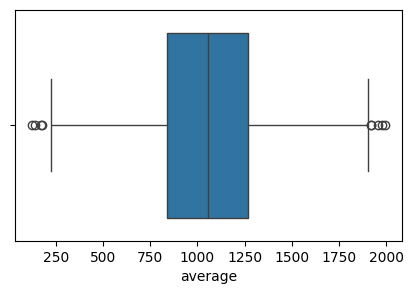

In [14]:
plt.figure(figsize=(5,3))
sns.boxplot(x="average",data = df)
plt.show()

In [15]:
q1 = df["average"].quantile(.25)
q3 = df["average"].quantile(.75)

iqr = q3-q1

min_range = q1 - 1.5 * iqr
max_range = q1 + 1.5 * iqr

df = df[(df["average"]>= min_range) & (df["average"]<=max_range)]


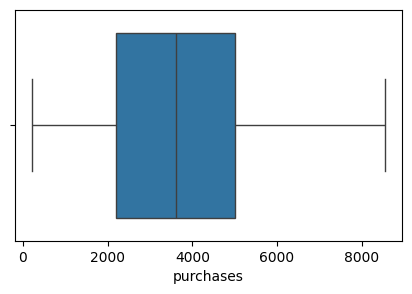

In [16]:
plt.figure(figsize=(5,3))
sns.boxplot(x="purchases",data = df)
plt.show()

In [17]:
df.to_csv("databangladeshi_users.csv",index=False)

splitting

In [18]:
x = df.drop(["purchases"], axis=1)  
y = df["purchases"]               

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


lazypredict regression

In [ ]:

reg = LazyRegressor( ignore_warnings=True, random_state=42)

models, predictions = reg.fit(x_train, x_test, y_train, y_test)
models

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 5
[LightGBM] [Info] Start training from score 3626.483333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,1.00,1.00,41.54,0.18
GradientBoostingRegressor,1.00,1.00,95.43,0.11
XGBRegressor,1.00,1.00,98.12,2.36
DecisionTreeRegressor,1.00,1.00,100.18,0.02
RandomForestRegressor,1.00,1.00,115.15,0.22
BaggingRegressor,0.99,0.99,149.91,0.05
LGBMRegressor,0.99,0.99,177.30,0.05
HistGradientBoostingRegressor,0.99,0.99,179.07,0.15
ExtraTreeRegressor,0.99,0.99,215.91,0.00


tuning

In [19]:
enet = ElasticNet(max_iter=10000)
param = {
    "alpha": [0.001, 0.01, 0.1, 0.5, 1, 10],
    "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9],
    "random_state": list(range(1, 50)),
    "selection": ['cyclic', 'random']
}

In [20]:
grd_srch = GridSearchCV(enet,param,cv=5,scoring="r2")
grd_srch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 10],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'selection': ['cyclic', 'random']},
             scoring='r2')

In [21]:
print("Best Parameters:", grd_srch.best_params_)
print("Best R² Score on CV:", grd_srch.best_score_)


Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.9, 'random_state': 41, 'selection': 'random'}
Best R² Score on CV: 0.9404366922945251


Model

In [28]:

enet = ElasticNet(alpha= 0.1, l1_ratio= 0.9,  random_state=41, selection= 'random')
enet.fit(x_train,y_train)

y_train_pred = enet.predict(x_train )
y_test_pred = enet.predict(x_test)

In [29]:
pred = pd.DataFrame({"actual" : y_test , "predictions" : y_test_pred})
pred.tail()

,actual,predictions
419,1446,2392.091428
411,5129,5562.205422
348,4305,4302.144373
67,5262,5176.774465
183,4284,4231.469214


plotting

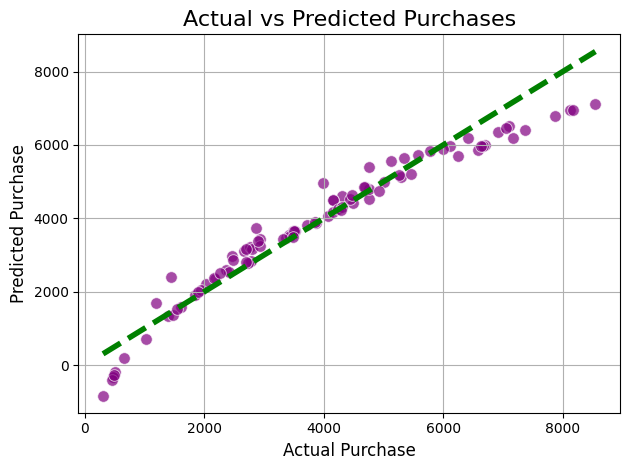

In [30]:
sns.scatterplot(x= y_test , y =y_test_pred ,c="purple",s=70,alpha =.7)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c="g",linestyle = "--",linewidth = 4)

plt.title("Actual vs Predicted Purchases", fontsize=16)
plt.xlabel("Actual Purchase", fontsize=12)
plt.ylabel("Predicted Purchase", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.show()


Evaluate

In [41]:
MSE = mean_squared_error(y_test,y_test_pred)
RMSE = np.sqrt(MSE)


print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("RMSE:", RMSE)



Train R²: 0.9444126215114872
Test R²: 0.9404435815841643
RMSE: 490.06352263917324


validation

In [42]:


r2_scores = cross_val_score(enet, x, y, cv=5, scoring='r2')

print("Cross-validated R² scores:", r2_scores)
print("Average R² score:", np.mean(r2_scores))
print("Standard Deviation of R²:", np.std(r2_scores))


neg_mse_scores = cross_val_score(enet, x, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-neg_mse_scores)
print("CV RMSE Scores:", rmse_scores)
print("Mean CV RMSE:", np.mean(rmse_scores))

Cross-validated R² scores: [0.9305295  0.94308401 0.9275746  0.94478395 0.93874888]
Average R² score: 0.9369441896998559
Standard Deviation of R²: 0.006802258198071535
CV RMSE Scores: [452.75167392 484.55886018 520.03172739 436.97145333 439.40588726]
Mean CV RMSE: 466.74392041756937


In [43]:
import joblib
joblib.dump(enet,"ElasticNet_Purchase_Prediction.pkl")

['ElasticNet_Purchase_Prediction.pkl']